# Data Analysis

First we are going to load the neccesary data.

In [5]:
import numpy as np
import pandas as pd
d_type={"REPORTING_AREA": str}
dataset_crimes = pd.read_csv("../crimes_data/crime.csv", encoding='iso-8859-1',delimiter=',',dtype=object);

The columns in the dataset are in order:
<pre>
1.  INCIDENT_NUMBER            7.  SHOOTING             13. UCR_PART
2.  OFFENSE_CODE               8.  OCCURRED_ON_DATE     14. STREET
3.  OFFENSE_CODE_GROUP         9.  YEAR                 15. LATITUDE
4.  OFFENSE_DESCRIPTION        10. MONTH                16. LONGITUDE
5.  DISTRICT                   11. DAY_OF_WEEK          17. LOCATION
6.  REPORTING_AREA             12. HOUR

</pre>

We do not need every column.For example the first column (INCIDENT_NUMBER) is absolutely pointless for the purposes of the analysis.


In [6]:
offense_code = dataset_crimes.iloc[:, 1];        year = dataset_crimes.iloc[:, 8]; longitude = dataset_crimes.iloc[:, 15]
offense_code_group = dataset_crimes.iloc[:, 2];  month = dataset_crimes.iloc[:, 9]
offense_description = dataset_crimes.iloc[:, 3]; day = dataset_crimes.iloc[:, 10]
district = dataset_crimes.iloc[:, 4];            hour = dataset_crimes.iloc[:, 11]
reporting_area = dataset_crimes.iloc[:, 5];      ucr_part = dataset_crimes.iloc[:, 12]
shooting = dataset_crimes.iloc[:, 6];            street = dataset_crimes.iloc[:, 13]
occured_on_date = dataset_crimes.iloc[:, 7];     latitude = dataset_crimes.iloc[:, 14]

Now that we have everything we need.Let's see the number of crimes that happened according to year month and day.
For this we will need the below dictionary

In [3]:
year_dict={'2015':0,'2016':0,'2017':0,'2018':0}
for a in year_dict:
    month_dict={'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0,'11':0,'12':0}
    year_dict[a]=month_dict
    for b in month_dict:
        day_dict={'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}
        year_dict[a][b]=day_dict

for i in range(len(year)):
    year_dict[str(year[i])][str(month[i])][str(day[i])]+=1


We have at the dictionary all the information.We will take this info and add it to lists in order to show the graphs.

In [4]:
years=['2015','2016','2017','2018'];                                             crimes_y=[0,0,0,0]
months=['1','2','3','4','5','6','7','8','9','10','11','12'];                     crimes_m=[0,0,0,0,0,0,0,0,0,0,0,0]
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'];   crimes_d=[0,0,0,0,0,0,0]

i=0
for a in year_dict:
    j=0
    for b in year_dict[a]:
        y=0
        for c in year_dict[a][b]:
            crimes_d[y]+=year_dict[a][b][c]
            crimes_m[j]+=year_dict[a][b][c]
            crimes_y[i]+=year_dict[a][b][c]
            y+=1
        j+=1
    i+=1


The graphs for the number of crimes per year month and day

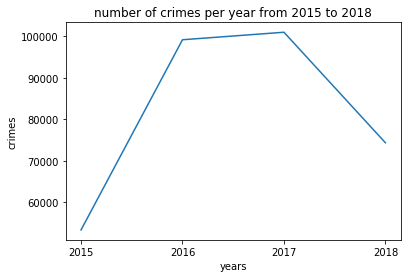

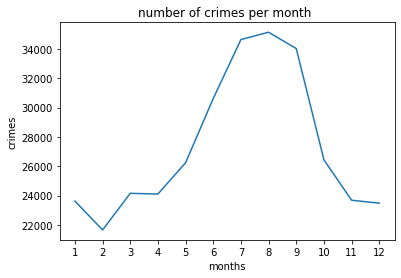

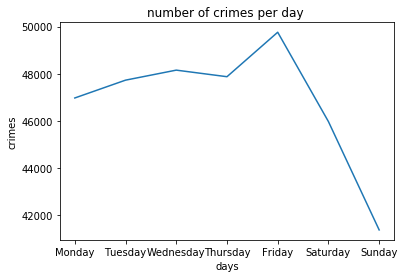

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(years, crimes_y)
plt.xlabel('years')
plt.ylabel('crimes')
plt.title('number of crimes per year from 2015 to 2018')
plt.show()

plt.plot(months, crimes_m)
plt.xlabel('months')
plt.ylabel('crimes')
plt.title('number of crimes per month ')
plt.show()

plt.plot(days, crimes_d)
plt.xlabel('days')
plt.ylabel('crimes')
plt.title('number of crimes per day ')
plt.show()


We store again the info into a dictionary

In [6]:
DISTRICT_dict={}

for a in district:
    s=str(a)
    if s=='nan':
        s="ND"
    if s in DISTRICT_dict:
        DISTRICT_dict[s] += 1
    else:
        DISTRICT_dict[s] = 1
        


We take the dictionary and convert it into two lists

In [7]:
districts=list(DISTRICT_dict.keys()); crimes_ds=list(DISTRICT_dict.values())

Graph for the number of crimes per district .ND means that No District

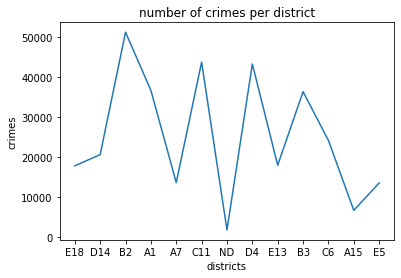

In [8]:
plt.plot(districts, crimes_ds)
plt.xlabel('districts')
plt.ylabel('crimes')
plt.title('number of crimes per district')
plt.show()

Now we will see where most of the shootings heppened and at what year.We will use a dictionary again but this time we only care about the years and the districts.

In [9]:
year_dict_sh={'2015':0,'2016':0,'2017':0,'2018':0}

for a in year_dict_sh:
    districts_dict={ i : 0 for i in districts }
    year_dict_sh[a]=districts_dict
    
for i in range(len(year)):
    
    if str(shooting[i])!='nan':
        s=str(district[i])
        if s=='nan':
            s="ND"
        year_dict_sh[str(year[i])][s]+=1
        

Insert the information to lists

In [10]:
shootings_ds=[0] *len(districts); shootings_yr=[0] *len(years)
i=0
for a in year_dict_sh:
    j=0
    for b in year_dict_sh[a]:
        shootings_yr[i]+=year_dict_sh[a][b]
        shootings_ds[j]+=year_dict_sh[a][b]
        j+=1
    i+=1
    


Graph for the number of shootings per district and year .ND means that No District

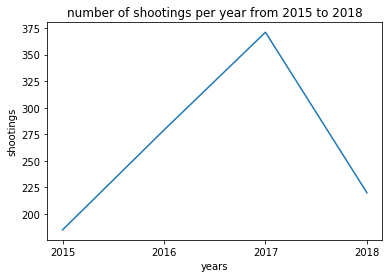

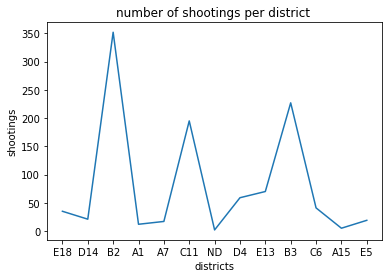

In [11]:
plt.plot(years, shootings_yr)
plt.xlabel('years')
plt.ylabel('shootings')
plt.title('number of shootings per year from 2015 to 2018')
plt.show()

plt.plot(districts, shootings_ds)
plt.xlabel('districts')
plt.ylabel('shootings')
plt.title('number of shootings per district ')
plt.show()

We will examine now the hours that the crimes happened specifically if it was day or night.WE consider as night the times between 6 pm and 6am/

In [12]:
day_or_night=[]

for a in hour:
    if int(a)>=18 or int(a)<=6:
        day_or_night.append("Night")
    else:
        day_or_night.append("Day")


The graph for day or night crime .This time we have only to variables so we will use a pie chart

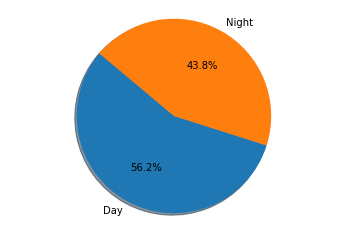

In [13]:
plt.pie([day_or_night.count("Day"),day_or_night.count("Night")],labels=["Day","Night"],autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Surprisingly the crimes are more during the day.
Lets see a more accurate represantaion by seeing all hours of the day

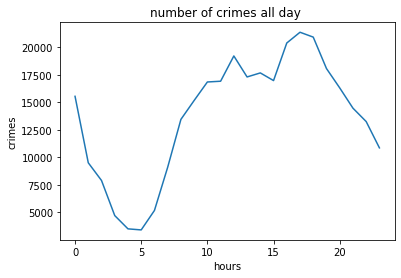

In [14]:
hours=[i for i in range(24)]
hours_cr={i:0 for i in range(24)}

for a in hour:
    hours_cr[int(a)]+=1

hours_cr=list(hours_cr.values())    
plt.plot(hours, hours_cr)
plt.xlabel('hours')
plt.ylabel('crimes')
plt.title('number of crimes all day ')
plt.show()

During the day is where most crime happens but what is the most common type

In [15]:
crime_code_dict={}

for i in range(len(day_or_night)):
    if day_or_night[i]=="Day":
        ocg=str(offense_code_group[i])
        if ocg in crime_code_dict:
            crime_code_dict[ocg] += 1
        else:
            crime_code_dict[ocg] = 1
            


There are too many types so we will take the top 10

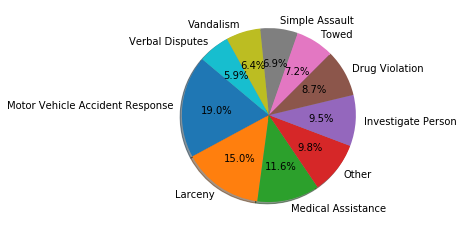

In [16]:
import operator
crime_code_dict = dict(sorted(crime_code_dict.items(), key=operator.itemgetter(1), reverse=True)[:10])

ocgs=list(crime_code_dict.keys()); crimes_per_code=list(crime_code_dict.values())

plt.pie(crimes_per_code,labels=ocgs,autopct='%1.1f%%', 
        shadow=True, startangle=140)

plt.show()

Clustering based on the geographical location

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import folium as folium

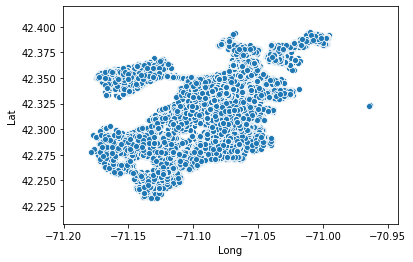

In [28]:
location = dataset_crimes[['Lat','Long']].dropna().reset_index(drop=True).astype(float)
location = location.loc[(location['Lat']>40) & (location['Long'] < -60)].dropna().reset_index(drop=True)
ax = sns.scatterplot(x="Long",y="Lat", data=location)

In [29]:
#KMeans
km = KMeans(n_clusters=2)
km.fit(location)
km.predict(location)
#add colors based on label from kmeans
location['cluster'] = pd.Series(km.labels_)
location.tail()

,Lat,Long,color
306408,42.336951,-71.085748,0
306409,42.255926,-71.123172,1
306410,42.255926,-71.123172,1
306411,42.302333,-71.111565,1
306412,42.333839,-71.080290,0


In [33]:
center = [location['Lat'].mean(),location['Long'].mean()]
print("Centering map at:"+str(center))
colorPalette = ['red', 'blue', 'green']
m = folium.Map(location=center)
for row in location.itertuples(index=True):
    color = colorPalette[getattr(row, "color")]
    folium.Marker([getattr(row, "Lat"),getattr(row, "Long")], icon=folium.Icon(color=color)).add_to(m)
m

Centering map at:[42.3222922192673, -71.08284125482706]


MemoryError: 